<a href="https://colab.research.google.com/github/CoDeRror555/Analytic_projects/blob/main/game_seller_shop/game_seller_shop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Анализ рынка компьютерных игр
* ****
## Заказчик — инрернет магазин по продаже компьютерных игр
## Задачи исследования:
* **Определить структуру рынка компьютерных игр**
* **Выявить особенности и закономерности структуры продаж**
* **Узнать определяющие успешность игры закономерности**
* **Дать рекомендации по в формировании рекламной стратегии**
* **Определить потенциально успешные платформы**
 ## Решённые задачи:
 - [x] **Проведена предобработка данных**
 - [x] **Определена структура рынка**
 - [x] **Выявлены особенности и закономерности структуры продаж**
 - [x] **Определен средний жизненный цикл платформ**
 - [x] **Обнаружены потенциально успешные платформы и жанры**
 - [x] **Составлен портрет пользователя для кождого региона**
 - [x] **Даны рекомендации по потенциально успешним платформам и жанрам в разрезе регионов**
### Используемые инструменты:
*python, numpy, pandas, matplotlib, seaborn, plotly, missingno, scipy*
* **


In [1]:
# работа с таблицами
import numpy as np
import pandas as pd
# ploting
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# date and regular expressions
from datetime import datetime
import re

# analitic missing values
import missingno as msno

# statistic
from scipy import stats as st

# sis
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
from pandas.core.window.doc import annotations


In [2]:
# добавляет аннотации к барам
def add_value_labels(ax,bar_or_barh, space=4,fmt="{:.1f}"):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
        frm: format annotaitions
        bar_or_barh: chose bar or barh pyplot
    """
    if bar_or_barh == 'bar':
        # For each bar: Place a label
        heights = [rect.get_height() for rect in ax.patches]
        for rect in ax.patches:
            # Get X and Y placement of label from rect.
            y_value = rect.get_height()
            x_value = rect.get_x() + rect.get_width() / 2


            if y_value > 0:
                va = 'bottom'
                label = fmt.format(y_value)
                # Create annotation
                if y_value > max(heights)/2:
                    ax.annotate(
                        label,                      # Use `label` as label
                        (x_value, y_value/2),         # Place label at end of the bar
                        xytext=(0, space),          # Vertically shift label by `space`
                        textcoords="offset points", # Interpret `xytext` as offset in points
                        ha='center',                # Horizontally center label
                        va=va,
                        rotation=90,color='black',bbox = dict(boxstyle="round", fc="w", ec="0.99", alpha=0.7),size = 10)                      # Vertically align label differently for
                else:
                    ax.annotate(
                        label,                      # Use `label` as label
                        (x_value, rect.get_y()+rect.get_height()),         # Place label at end of the bar
                        xytext=(0, space),          # Vertically shift label by `space`
                        textcoords="offset points", # Interpret `xytext` as offset in points
                        ha='center',                # Horizontally center label
                        va=va,
                        rotation=90,size = 10)
            elif y_value == 0:
                va = 'top'
                label = fmt.format(y_value)
                ax.annotate(
                        label,                      # Use `label` as label
                        (x_value, rect.get_y()+rect.get_height()),         # Place label at end of the bar
                        xytext=(0, space),          # Vertically shift label by `space`
                        textcoords="offset points", # Interpret `xytext` as offset in points
                        ha='center',                # Horizontally center label
                        va='center',
                        rotation=90,size = 10)

            else:

                # Invert space to place label belo
                # Vertically align label at top
                va = 'top'
                # Use Y value as label and format number with one decimal place
                label = fmt.format(y_value)
                    # Create annotation
                if y_value < min(heights)/2:
                    ax.annotate(
                        label,                      # Use `label` as label
                        (x_value, y_value/2),         # Place label at end of the bar
                        xytext=(0, 0),          # Vertically shift label by `space`
                        textcoords="offset points", # Interpret `xytext` as offset in points
                        ha='center',                # Horizontally center label
                        va=va,
                        rotation=90,color='black',bbox = dict(boxstyle="round", fc="w", ec="0.99", alpha=0.7),size = 10)                      # Vertically align label differently for
                                                    # positive and negative values.
                else:
                    ax.annotate(
                        label,                      # Use `label` as label
                        (x_value, rect.get_y()+rect.get_height()),         # Place label at end of the bar
                        xytext=(0, 0),          # Vertically shift label by `space`
                        textcoords="offset points", # Interpret `xytext` as offset in points
                        ha='center',                # Horizontally center label
                        va=va,
                        rotation=90,size = 10)                      # Vertically align label differently for
                                                # positive and negative values.
    elif bar_or_barh == 'barh':

        # Получаем ширины столбиков
        widths = [rect.get_width() for rect in ax.patches]
        heights = [rect.get_height() for rect in ax.patches]
        # Добавляем аннотации на каждый столбик
        for i, rect in enumerate(ax.patches):
            # Перемещаем аннотацию внутрь столбика
            if widths[i] < 0:
                if widths[i] < min(widths)/2:
                    space *= -1
                    ax.annotate(fmt.format(widths[i]), xy=(widths[i]/2, rect.get_y() + rect.get_height()/2),\
                                xytext=(0, 0), textcoords="offset points", ha='center', va='center',color='black',bbox = dict(boxstyle="round", fc="w", ec="0.99", alpha=0.7),size = 10)
                else:
                    space *= -1
                    ax.annotate(fmt.format(widths[i]), xy=(rect.get_x() + rect.get_width(),rect.get_y() + rect.get_height() / 2),\
                            xytext=(space-3, 0), textcoords="offset points", ha='right', va='center',size = 10)

            elif widths[i] == 0:
                ax.annotate(fmt.format(widths[i]), xy=(widths[i],rect.get_y() + rect.get_height()/2),\
                            xytext=(0, 0), textcoords="offset points", ha='center', va='center',size = 10)

            elif widths[i] > 0:
                if widths[i] > max(widths)/2:
                    ax.annotate(fmt.format(widths[i]), xy=(widths[i]/2, rect.get_y() + rect.get_height()/2),\
                                xytext=(0, 0), textcoords="offset points", ha='center', va='center',color='black',bbox = dict(boxstyle="round", fc="w", ec="0.99", alpha=0.7),size = 10)

                else:
                    ax.annotate(fmt.format(widths[i]), xy=(rect.get_x() + rect.get_width(),rect.get_y() + rect.get_height() / 2),\
                            xytext=(space, 0), textcoords="offset points", ha='left', va='center',size = 10)
    else:
        return(print("inter name 'bar or bash'"))

In [3]:
# загрузим данные
# global case
df = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.com/d/Hoq-eScSl6HRxQ',index_col=0)

# Предобработка и исследовательский анализ данных

In [4]:
# функция для получения иныфо о данных
def df_info(df:pd.DataFrame) -> None:
    '''Распечатывает информацию о датафрейме'''
    print(f"Количество полных дубликатов: {df.duplicated().sum()}")
    print('****************')

    # Выводим инфо
    df.info()


    # Сохраняем пропуски
    df_nans = np.trim_zeros(df.isna().mean().sort_values())

    if len(df_nans > 0):
        print('\nNA:',end='')
        display(df_nans)

    # Пример данных
    display(df.dropna().sample().T)

    for col in df.columns:
        if df[col].nunique() < 20:
            display(df[col].value_counts())

In [5]:
# посмотрим на основную информацию
print(df.head())
print('****************************************')
print(df.info())

                         Platform  Year_of_Release         Genre  NA_sales  \
Name                                                                         
Wii Sports                    Wii           2006.0        Sports     41.36   
Super Mario Bros.             NES           1985.0      Platform     29.08   
Mario Kart Wii                Wii           2008.0        Racing     15.68   
Wii Sports Resort             Wii           2009.0        Sports     15.61   
Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

                          EU_sales  JP_sales  Other_sales  Critic_Score  \
Name                                                                      
Wii Sports                   28.96      3.77         8.45          76.0   
Super Mario Bros.             3.58      6.81         0.77           NaN   
Mario Kart Wii               12.76      3.79         3.29          82.0   
Wii Sports Resort            10.93      3.28         2.95          80.0   
Pok

* **Видно, что поде с именами игр находится в индексах, присутствуют пропуски по полям оценок и рейтингов, поле с оценками пользвателей не соотвецтвует числовому фармату**

In [6]:
# поднимем имена из индексов
df = df.reset_index()

In [7]:
# посмотрим более подробно на наш набор данных
df_info(df)

Количество полных дубликатов: 0
****************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB

NA:

Name               0.000120
Genre              0.000120
Year_of_Release    0.016093
User_Score         0.400897
Rating             0.404786
Critic_Score       0.513192
dtype: float64

,6190
Name,Silent Hill 2: Restless Dreams
Platform,XB
Year_of_Release,2001.0
Genre,Action
NA_sales,0.21
EU_sales,0.06
JP_sales,0.0
Other_sales,0.01
Critic_Score,84.0
User_Score,8.3


Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

* **Можно заметить нестандартные имена полей, и высокую долю пропусокв в полях с оценками и рейтингами. Приведем  название полей в порядок**

In [8]:
# приведем в порядок название полей
df.columns = re.findall('[А-Яа-яЁё0-9A-Za-z@._]+',str(list(df.columns)).lower())

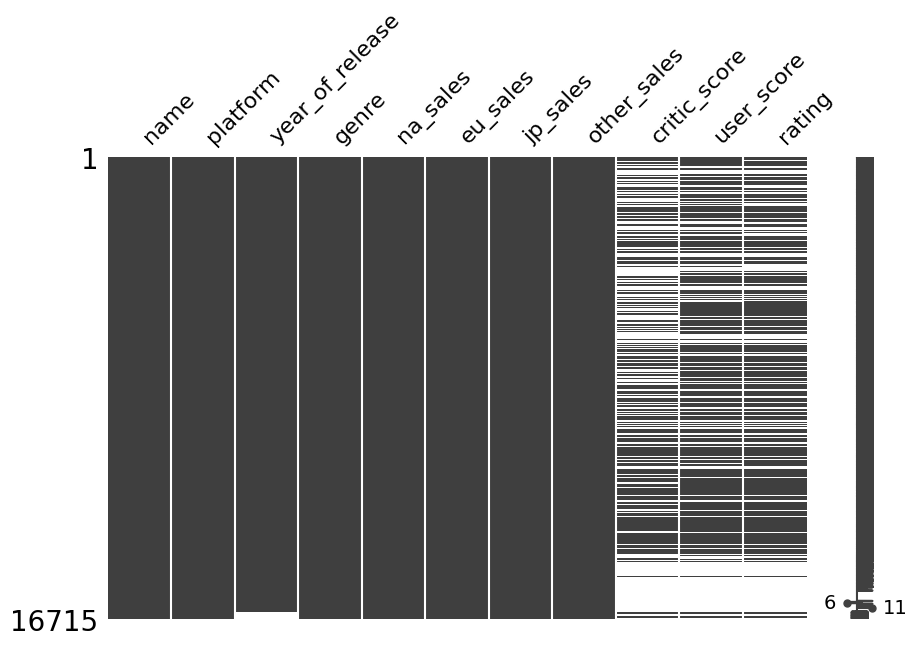

In [9]:
# посмотрим на пропуски ближе, построим митрицу заполнинности данных
ax = msno.matrix(df.sort_values(by='year_of_release', ascending=False), figsize = (10,6),sparkline=True )
plt.show(ax)

* **На матрице заполнинности видно отсутствие значений по полям с оценками и рейтингами в самый ранний период по нобору данных, также можно обратить внимание на высокий уровень уорреляции пропусков в этих полях**

## Провеирм поле year_of_release на ошибки и неявные дубликаты

In [10]:
# выведем уникальный значения
print(df['year_of_release'].unique())

[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]


In [11]:
# конвертирует значение в формат даты
def convertor(t):
  try:
    t = str(int(t))+'-01-01'

    return datetime.strptime(t, '%Y-%m-%d').date()

  except:
    return pd.NaT

In [12]:
# приведем поле у формату даты для дальнейшей удобной работы с ним
df['year_of_release'] = df['year_of_release'].apply(convertor).astype('datetime64[Y]',errors='ignore')
df['year_of_release'].astype('datetime64[Y]',errors='ignore')
df['year_of_release'].head()

0   2006-01-01
1   1985-01-01
2   2008-01-01
3   2009-01-01
4   1996-01-01
Name: year_of_release, dtype: datetime64[ns]

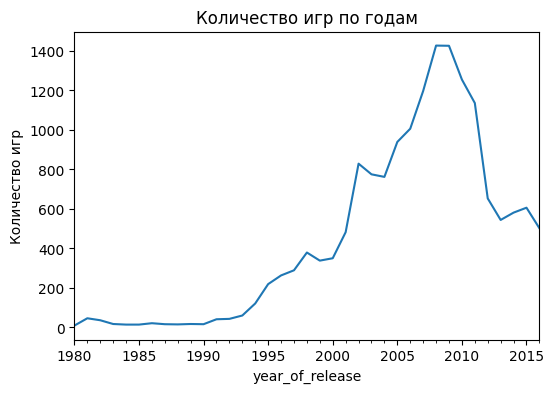

In [13]:
# построим графиг изменения количества игр по годам
df.groupby(by='year_of_release').count()['name'].plot(figsize =(6,4))
plt.title('Количество игр по годам')
plt.ylabel('Количество игр')
plt.show()

* **Можно заметить, что данные представлены с 1980 по 2016 год. Бурный рост количества игр наблюдается с середины 90-х по 2008, даллее выден спад возможной причиной которого может быть экономический кризис 2008 года**

## Разберем поле genre

In [14]:
# проверим на неявные дубликаты
print(df['genre'].unique())

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]


* **Неявных дубликатов не выяылено, продолжим работу как есть**

## Разберем поля с количественными значениями продаж

In [15]:
# добавим поле с обжими продажами по всем регионам
df['all_salse'] = df[['na_sales',	'eu_sales',	'jp_sales',	'other_sales']].sum(axis = 1)

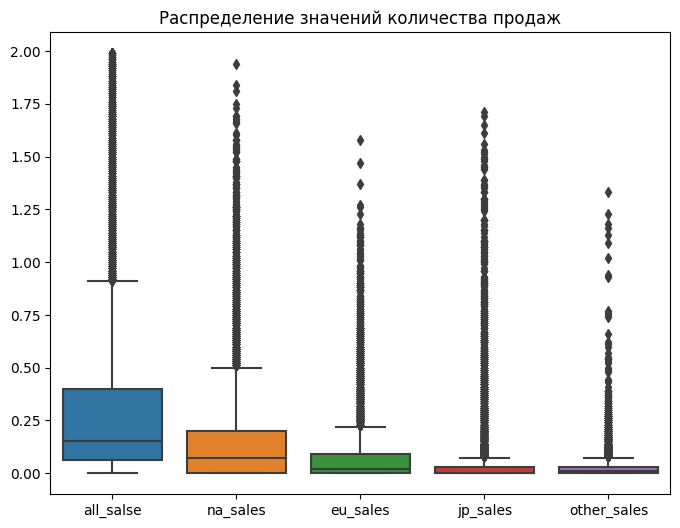

******************************************************************


,all_salse,na_sales,eu_sales,jp_sales,other_sales
count,16715.000000,16715.000000,16715.000000,16715.000000,16715.000000
mean,0.533396,0.263377,0.145060,0.077617,0.047342
std,1.548261,0.813604,0.503339,0.308853,0.186731
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.060000,0.000000,0.000000,0.000000,0.000000
50%,0.170000,0.080000,0.020000,0.000000,0.010000
75%,0.470000,0.240000,0.110000,0.040000,0.030000
max,82.540000,41.360000,28.960000,10.220000,10.570000


In [16]:
# посмотим на распределения значении продаж
plt.figure(figsize=(8,6))
sns.boxplot(df.loc[df['all_salse']<2][['all_salse','na_sales',	'eu_sales',	'jp_sales',	'other_sales']])
plt.title('Распределение значений количества продаж')
plt.ylabel('')
plt.show()
print("******************************************************************")
display(df[['all_salse','na_sales',	'eu_sales',	'jp_sales',	'other_sales']].describe())

* **Видно довольно большую разницу между средними и медианнымм знчениями и высокое стандартное отклонение, что говорит о наличии выбросов в данных полях, которые можно наблюдать на графике. Самые высокие продажи в Северной Америке, самые низкие в Японии. Аномальных значений не видно**

## Разберем поля user_score и critic_score

In [17]:
# проверим на ишибки
print(df['user_score'].unique())

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


* **В поле с рейтингами пользователей можно заметить много пропусков и аномальное текстовое значение, первое может говорить о начале выставления этих рейтингов только с бурным ростом гейм индустрии в 90 или позже второе можно интерпритировать как  фразу "to be determined"  и заменить пропусками**

In [18]:
# заменим пропусками
df.user_score = df.user_score.replace('tbd',np.NAN).astype('float')


In [19]:
# проверим на ишибки
print(df.critic_score.unique())

[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 35. 41. 36.
 28. 31. 27. 26. 19. 23. 24. 21. 17. 22. 13.]


* **Аномальных значений не видно, пропуски можно интерпритировать по логике выше**

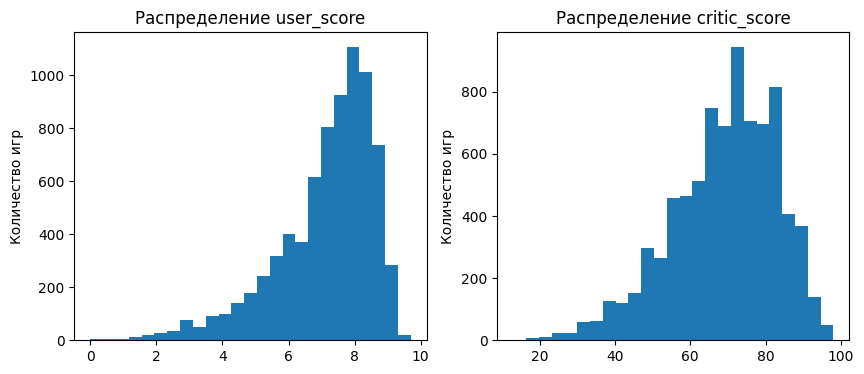

***************
 count    7590.000000
mean        7.125046
std         1.500006
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64 
******************
 count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64


In [20]:
# построим графики
ax = plt.subplot(1,2,1)
df['user_score'].plot.hist(ax = ax ,bins = 25)
plt.title("Распределение user_score")
plt.ylabel('Количество игр')


ax1 = plt.subplot(1,2,2)
df['critic_score'].plot.hist(ax = ax1, bins = 25, figsize=(10,4))
plt.title("Распределение critic_score")
plt.ylabel('Количество игр')
plt.show()
print('***************\n',df['user_score'].describe(),'\n******************\n',df['critic_score'].describe())

* **Пользовательские рейтинги имеют левостороннее распределение смещенное в большую сторону с медианным значением в 7.5 баллов и стандартным отклонением в 1.5, оценки выставлены по 10 бальной шкале. Оценки критиков имеют также левостороннее распределение смещенное в большую сторону с медианным значением в 71 балл и стандартным отклонением в 14, что имеет очень похоже на картину с оценками пользователей, с небольгим смижением в меньшую сторону**

## Разберем поле rating

In [21]:
# посмотрим на уникальные значения
df.rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

**Можно заметить что 'K-A'  это устаревшее названяе рейтинга 'E' тоесть "для всех", заменим значения**

In [22]:
# заменим
df.rating = df.rating.replace('K-A', 'E')

****

**Посмотрим на распределения количества продаж и числа игр по жанрам**

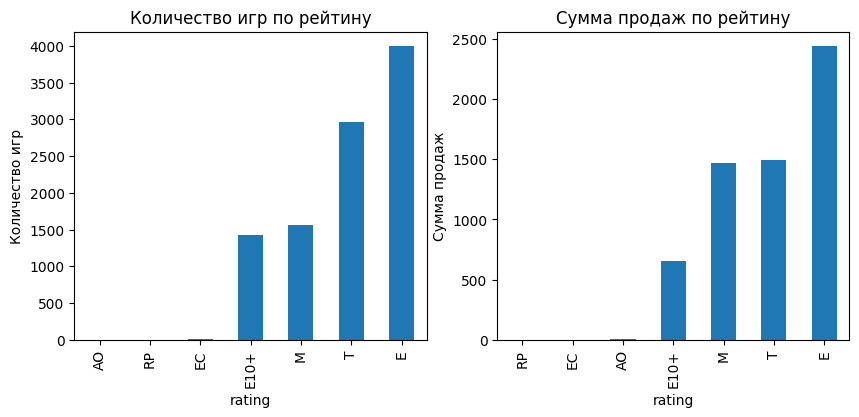

In [23]:
# построим графики
ax = plt.subplot(1,2,1)
df.groupby(by=['rating']).count()['name'].sort_values().plot(kind = 'bar', ax = ax)
plt.title("Количество игр по рейтину")
plt.ylabel('Количество игр')


ax1 = plt.subplot(1,2,2)
df.groupby(by=['rating'])['all_salse'].sum().sort_values().plot(kind = 'bar', ax= ax1,figsize=(10,4))
plt.title("Сумма продаж по рейтину")
plt.ylabel('Сумма продаж')
plt.show()

* **Можно заметить, что в топе находится категория для всех, что неудивительно так как это самая многочисленная категория геймеров. Категории 'AO' и 'EC' две крайности для совсем юных и уже взрослых геймеров, количество игр и продажи по ним на очень низком уровне. Также видно, что в категории для лиц старше 17 лет больше количество продаж на игру чем в сопостовимой котигории для подростков. Исходя из вышесказанного можно сделать вывод о стремлении производителей игр охватить максимально возможную аудиторию**

## Разберем столбец с названиями

In [24]:
print(f"Количество уникальных названий игр равно: {len(df.name.unique())}, количество дубликатов равно: {sum(df.name.duplicated())} ")

Количество уникальных названий игр равно: 11560, количество дубликатов равно: 5155 


* **Судя по наличию  большого количества  повторяющихся названий, можно предположить что они переиздовались в разное время и на разные платформы**

In [25]:
# финкця для очистки строк
def ref(s):
  try:
    s = s.lower()
    s = ' '.join(re.findall('[А-Яа-яЁё0-9-email A-Za-z@:^M{0,3}(CM|CD|D?C{0,3})(XC|XL|L?X{0,3})(IX|IV|V?I{0,3})()$]+', s))

    return s
  except:
    return np.NaN


In [26]:
# проверим наличие дибликатов после очистки строк
len(df.name.apply(ref).unique())

11558

In [27]:
# нашедся еще оддин дубль, перезапишем столбец
df.name = df.name.apply(ref)

In [28]:
# посмотрим на структуру ремейков и портов игр
t = df[df.duplicated(subset='name')].groupby(by='name')[['platform','year_of_release','genre']].nunique()
plt.figure(figsize =(12,4))
for i, k in zip(t.columns,range(3)):
  print("***********************")
  print(t[t[i]>1][i].describe())


***********************
count    1284.000000
mean        2.827103
std         1.186313
min         2.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         9.000000
Name: platform, dtype: float64
***********************
count    228.000000
mean       2.135965
std        0.413351
min        2.000000
25%        2.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: year_of_release, dtype: float64
***********************
count    4.0
mean     2.0
std      0.0
min      2.0
25%      2.0
50%      2.0
75%      2.0
max      2.0
Name: genre, dtype: float64


<Figure size 1200x400 with 0 Axes>

* **Судя по структуре дублей, игры часто портируются на разные плтформы и переиздаются в разные годы**

## Разберем поле с genre

In [29]:
df.genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

* **Ошибок и неявных дублей не видно**

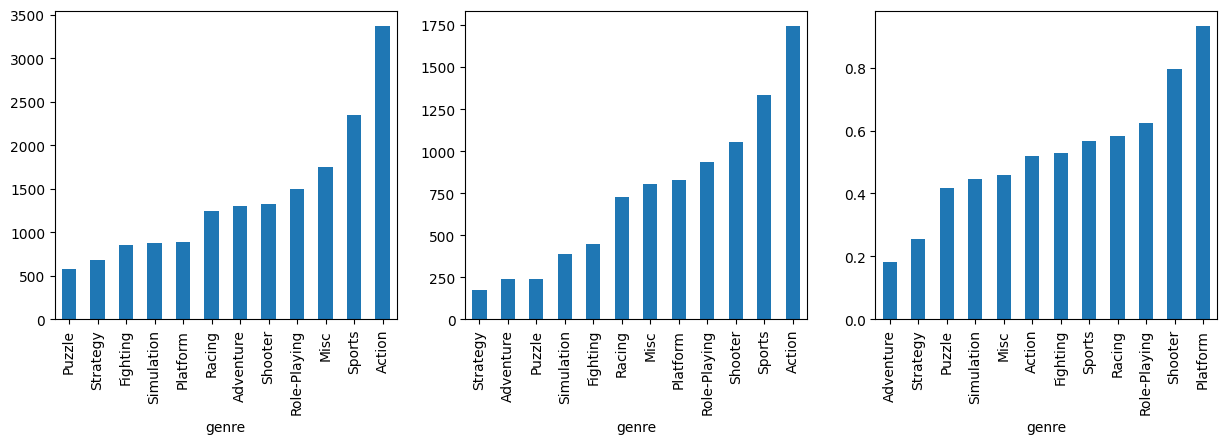

In [30]:
# построим графики
ax = plt.subplot(1,3,1)
df.groupby(by=['genre']).count()['name'].sort_values().plot(kind = 'bar', ax = ax)

ax1 = plt.subplot(1,3,2)
df.groupby(by=['genre'])['all_salse'].sum().sort_values().plot(kind = 'bar', ax= ax1)



t = df.groupby(by=['genre'])['all_salse'].sum().sort_values()/df.groupby(by=['genre']).count()['name'].sort_values()
ax2 = plt.subplot(1,3,3)
t.sort_values().plot(kind = 'bar', ax= ax2,figsize=(15,4))
plt.show()

* **На графиках можно заметить что в лидерах игры в жанре sports и action, тогда как пазлы, стратегии и приключения не имели больших продаж. Так же можно обратить внимание на давольно высокий показатель отношения количества игр на количество продаж в жанрах shooter и platform тогда как в жанрах преключения и стратегии этот показатель один из самых низких**

## Разберем поле с названиями платформ

In [31]:
# посмотрим на уникальные заначения

print(f"Количество уникальных платформ: {len(df.platform.unique())}")
print('***********************************')
print(df.platform.unique())

Количество уникальных платформ: 31
***********************************
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


* **Неявных дубликатов не видно**

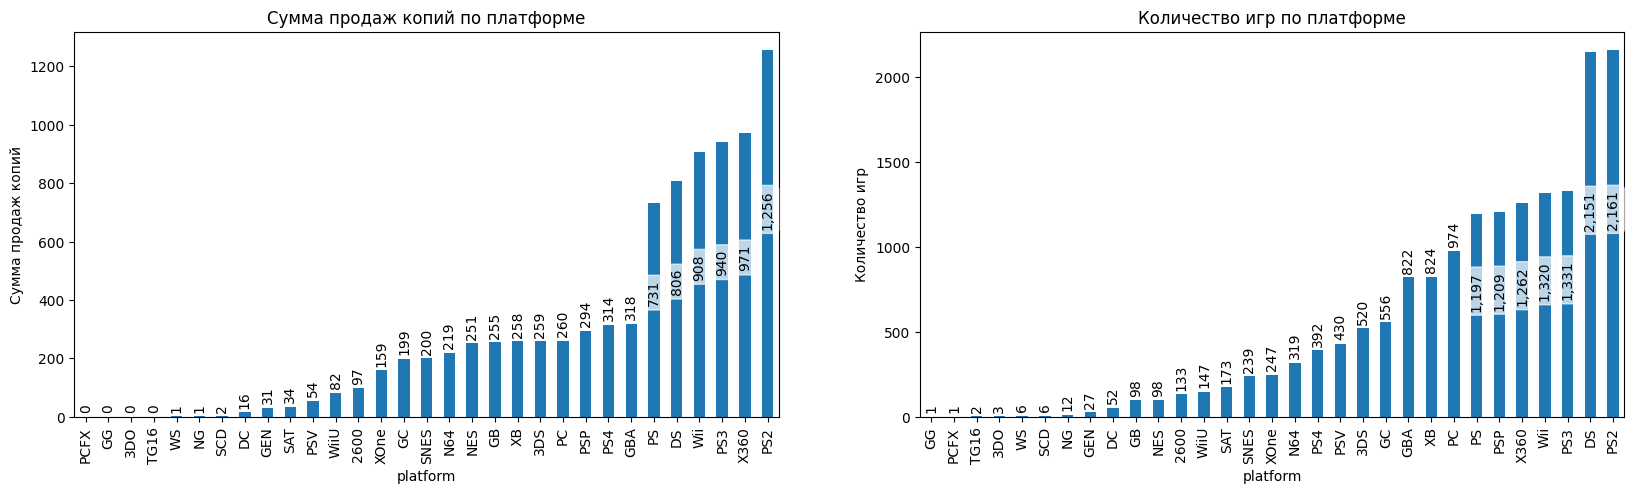

In [32]:
#  посмотрим на количество игр и продаж по влатформам построим графики
ax = plt.subplot(1,2,1)
df.groupby(by=['platform']).sum('all_salse')['all_salse'].sort_values().plot(kind = 'bar', ax = ax)
plt.title("Сумма продаж копий по платформе")
plt.ylabel('Сумма продаж копий')
add_value_labels(ax,'bar', space=3,fmt='{:,.0f}')




ax1 = plt.subplot(1,2,2)
df.groupby(by=['platform']).count()['name'].sort_values().plot(kind = 'bar', ax= ax1,figsize=(20,5))
plt.title("Количество игр по платформе")
plt.ylabel('Количество игр')
add_value_labels(ax1,'bar', space=3,fmt='{:,.0f}')
plt.show()

* **Мы видим большое количество молоизвестных платформ с небольшим количеством выпущенных игр и низким уровнем продаж, для анализа рынка эти данные будут иметь меленькую ценность поэтому лучше от них избавиться**

In [33]:
# выделим 10 малоизвестных платформ
active_pd = df.groupby(by=['platform']).sum('all_salse')['all_salse'].sort_values().head(10).index
print(df.groupby(by=['platform']).sum('all_salse')['all_salse'].sort_values().head(10))


platform
PCFX     0.03
GG       0.04
3DO      0.10
TG16     0.16
WS       1.42
NG       1.44
SCD      1.86
DC      15.95
GEN     30.77
SAT     33.59
Name: all_salse, dtype: float64


In [34]:
print(f"Доля продаж 10 малоизвестных платформ составляет:",round(sum(df.groupby(by=['platform']).sum('all_salse')['all_salse'].sort_values().head(10))/sum(df.query("platform not  in @active_pd")['all_salse']), 2))

Доля продаж 10 малоизвестных платформ составляет: 0.01


In [35]:
# очистим данные
df = df.query("platform not in @active_pd")

## Посмотрим на динамику изменения количества продаж по платформам

In [36]:
# выделим данные
cum_ganre = df.groupby(by=['genre','year_of_release'])['all_salse'].sum().groupby(level=[0,1]).sum().reset_index()
#cum_game = df.groupby(by=['platform','year_of_release'])['name'].count().groupby(level=[0,1]).sum().reset_index()
cum_sales = df.groupby(by=['platform','year_of_release'])['all_salse'].sum().groupby(level=[0,1]).sum().reset_index(level= [0,1])
cum_sales.year_of_release = cum_sales.year_of_release.astype(str)

In [37]:
# построим график
fig = px.area(cum_sales, x = 'year_of_release',  y="all_salse", color="platform",line_group='platform',line_shape='spline',title = 'Историческая динамика продаж по платформам',
             color_discrete_sequence=px.colors.qualitative.Dark24)

fig.update_xaxes(tickangle=45)
fig.update_layout(width=1100, height=550)
fig.show()

* **На историческом графике изменения кольчества продаж по годам отчетливо видны циклы роста и угасания платформ, в целом средний срок жизни платформы составляет от 5 до 10 лет. Причем первую половину жизненного цикла наблюдается приимущественно рост продаж тогда как вторую спад. Начиная с 90 годов прошлого века заметен бурный рост гейм индустрии, однако после 2008 года наблюдается коррекция продаж, возможно связанная с финансовым кризисом. Также мы можем заметить наличие большого количества уже умерших платформ на текущую дату, для анализа актуальной ситуации на рынке эти данные будут не информативны.**

## Разберемся с исторической динамикой доли жанров

In [38]:
# построим график
import plotly.express as px

fig = px.area(cum_ganre, x="year_of_release", y="all_salse", color="genre",line_shape='spline',groupnorm='percent', title = 'Историческая динамика доли жанров',
             color_discrete_sequence=px.colors.qualitative.Dark24)
fig.update_xaxes(tickangle=45)
fig.update_layout(width=1350, height=550)
fig.show()

* **На грифике можно заметить, что до середины 90 годов нет четких тенденций в изменении доли жанров, однако в этот период доминируют платформенные игры и пазлы, что можно объяснить расцветом 8-ми битных приставок и таках культовых игр как "Contra", "Battle City", бесконечное число ремейков "Mario" и многое другое. Всплеск доли пазлов в этот период - это возможная заслуга "Microsoft Solitaire". Начиная с 00-х можно заметить четкую тенденцию на спад платформеров и рост доли игр в жанрах  shooter и action, что говорит о приходе на рынок новых платформ с более мощным железом, которые задают тренд на 3-х мерные игры с возможностью многопользовательской игры по сети интернет**

## Рассчитаем и отобразим срок жизни плаформ в течении которого на них выходят игры

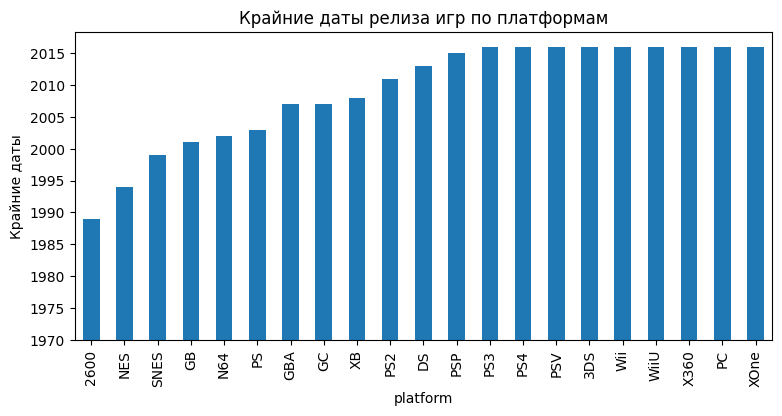

In [39]:
# посмотирм максимальные даты релиза новых игр на пратформах
t = df.groupby(by='platform')['year_of_release'].max().sort_values()
ax = t.plot(kind= 'bar', figsize=(9,4))
plt.title("Крайние даты релиза игр по платформам")
plt.ylabel('Крайние даты')
plt.show()

* **Мы видим, что на многих платформах не выходят новые игры уже больше 2 лет исходя из чего можно предположить что цикл их активного существования завершен и делать анализ текущего состояния рынка на их основании не совсем целесообразно.**

In [40]:
# выделим данные и построим график с оконченным жизненным циклом платформ
mean_lifetime = df.groupby(by='platform')['year_of_release'].agg(['max','min'])
mean_lifetime = mean_lifetime[mean_lifetime['max']<'2015-01-01']
print(mean_lifetime)
mean_lifetime = mean_lifetime['max'] - mean_lifetime['min']
mean_lifetime = mean_lifetime/np.timedelta64(1, 'Y')


                max        min
platform                      
2600     1989-01-01 1980-01-01
DS       2013-01-01 1985-01-01
GB       2001-01-01 1988-01-01
GBA      2007-01-01 2000-01-01
GC       2007-01-01 2001-01-01
N64      2002-01-01 1996-01-01
NES      1994-01-01 1983-01-01
PS       2003-01-01 1994-01-01
PS2      2011-01-01 2000-01-01
SNES     1999-01-01 1990-01-01
XB       2008-01-01 2000-01-01


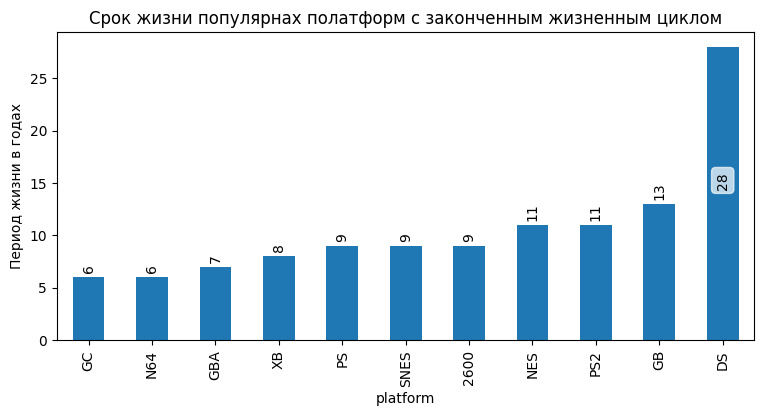

*********************
Средний срок жизни популярной платформы: 11


In [41]:
# построим график
ax = mean_lifetime.sort_values().plot(kind='bar', figsize=(9,4))
plt.title("Срок жизни популярнах полатформ с законченным жизненным циклом")
plt.ylabel('Период жизни в годах')
add_value_labels(ax,'bar', space=3,fmt='{:,.0f}')
plt.show()
print('*********************')
print(f"Средний срок жизни популярной платформы: {round(mean_lifetime.mean())}")

* **Мы видим, что средний срок жизни по платформам прошедшим цикл существования порядка 10 лет. Видно анамальное значение срока жизни у платформы DS, хотя она анонсированна в 2004 году, определим что стало причиной такой анамалии**

In [42]:
# Выделим данные
df[(df['platform'] == 'DS')&(df['year_of_release'] < '2000-01-01 00:00:00')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_salse
15957,strongest tokyo university shogi ds,DS,1985-01-01,Action,0.0,0.0,0.02,0.0,NaN,NaN,NaN,0.02


* **Явно ошибочное значение, японские настольные шахматы тут точно лишние. Уберем значение и построим график заново**

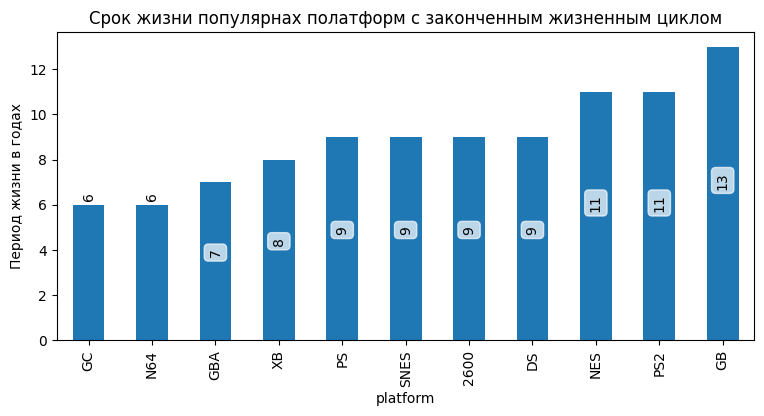

*********************
Средний срок жизни популярной платформы: 9


In [43]:
df = df[df['name'] != 'strongest tokyo university shogi ds']
# выделим данные и построим график с оконченным жизненным циклом платформ
mean_lifetime = df.groupby(by='platform')['year_of_release'].agg(['max','min'])
mean_lifetime = mean_lifetime[mean_lifetime['max']<'2015-01-01']
mean_lifetime = mean_lifetime['max'] - mean_lifetime['min']
mean_lifetime = mean_lifetime/np.timedelta64(1, 'Y')
# построим график
ax = mean_lifetime.sort_values().plot(kind='bar', figsize=(9,4))
plt.title("Срок жизни популярнах полатформ с законченным жизненным циклом")
plt.ylabel('Период жизни в годах')
add_value_labels(ax,'bar', space=3,fmt='{:,.0f}')
plt.show()
print('*********************')
print(f"Средний срок жизни популярной платформы: {round(mean_lifetime.mean())}")

* **Теперь все на своих местах, средний рок жизни популярной платформы составляет порядка 9 лет**

* **Повторим рассчет для актуальных платформ**

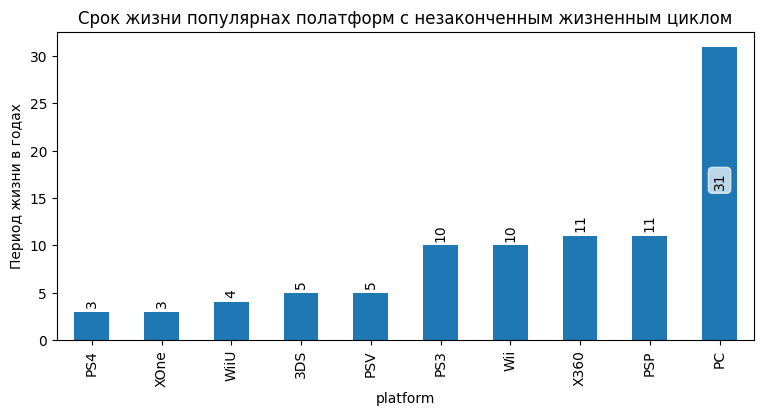

*********************
Средний срок жизни популярной платформы: 9


In [44]:
# выделим данные и построим график с неоконченным жизненным циклом платформ
mean_lifetime = df.groupby(by='platform')['year_of_release'].agg(['max','min'])
mean_lifetime = mean_lifetime[mean_lifetime['max']>='2015-01-01']
mean_lifetime = mean_lifetime['max'] - mean_lifetime['min']
mean_lifetime = mean_lifetime/np.timedelta64(1, 'Y')
# построим график
ax = mean_lifetime.sort_values().plot(kind='bar', figsize=(9,4))
plt.title("Срок жизни популярнах полатформ с незаконченным жизненным циклом")
plt.ylabel('Период жизни в годах')
add_value_labels(ax,'bar', space=3,fmt='{:,.0f}')
plt.show()
print('*********************')
print(f"Средний срок жизни популярной платформы: {round(mean_lifetime.mean())}")

* **На графике срока жизни актуальных платформ можно заметить как старичков, доживающих свой срок, так и довольно молодие платформы, набирающие популярность. Отдельным особняком находится PC где все относительно стабильно и зависит от общего положения дел на рынке. Можно предположить что основной вклад в общие продажи внесут довольно молодие платформы со сроком жизни 3-5 лет в сочитанием с продажами на пк**

## Проведем анализ полноты данных по пропускам в оценках критиков

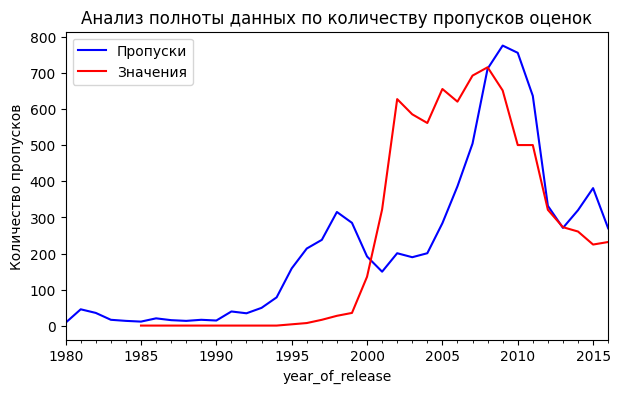

In [45]:
# Выделим наддые и построим график
df[df['critic_score'].isna()].groupby(by= 'year_of_release')['name'].count().plot(color = 'b')
df[~df['critic_score'].isna()].groupby(by= 'year_of_release')['name'].count().plot(color = 'r',figsize=(7,4))
plt.title("Анализ полноты данных по количеству пропусков оценок")
plt.ylabel('Количество пропусков')
plt.legend(['Пропуски',"Значения"])
plt.show()

* **Можно заметить, что данные до начала 00-х годов содержат очень мало информации о оценках критиков поэтому можно предпольжить, что отрасль и стандартизация оценок компьютерных игр сформировалась в середине 90-Х**

* **Исходя из выявденных выше фактов дальнейший анализ будем строить на аснове днных в актуальных платформах которые имели хотябы один релиз в текущем и прошом году, платформы с отсутствием новых релизов в этот период можно считать неактуальными**

## Анализ распределения продаж в актуальных платформах

In [46]:
# выделим данные
mean_lifetime = df.groupby(by='platform')['year_of_release'].agg(['max','min'])
mean_lifetime = mean_lifetime[mean_lifetime['max']>='2015-01-01']
mean_lifetime = mean_lifetime['max'] - mean_lifetime['min']
mean_lifetime = mean_lifetime/np.timedelta64(1, 'Y')
actual = df.query("platform in @mean_lifetime.index")
mean_lifetime = round(mean_lifetime)

actual = actual.merge( mean_lifetime.to_frame(),how='left',on='platform', validate = 'm:1', indicator = False)
actual = actual.rename(columns = {0:'life_period'})
actual = actual[actual['year_of_release']>'2004-01-01']

In [47]:
# потроим график распределения продаж в актуальных платформах
import plotly.express as px

fig = px.box(actual, x="platform", y="all_salse",color ='life_period',   notched  = True,   points = 'outliers',boxmode = 'overlay',title = 'Распределение продаж в акруальных платформах',\
             facet_col_spacing  = 0.9,facet_col_wrap = 1,range_y = [0,3],hover_name  = 'name', hover_data = 'life_period',
             color_discrete_sequence=px.colors.qualitative.Dark24)
fig.update_xaxes(tickangle=45)
fig.update_layout(width=1150, height=550)
fig.show()

* **На графике можно заметить, что платформы чтетко разделились по покалениям 10-11 лет это уходящие и затухающие платформы и 3-5 лет довольно молодые и перспективные, на которые надо делать ставку при прогнозировании и формировании маркетинговых компаний. Основная конкуренция на рынке игровой индустрии между консолями Microsoft, Nintendo и Sony. Партативные консоли выпускают и обновляют Nntendo и Sony. Максимальные продажами могут похвастаться кансоли Sony и Xbox игры Nintendo имеют чуть более скромные резултаты. Продажи игр на пк имеют значительно меньшие размеры и немного другую целевую аудиторию, ввиду чего анализ пк геиминга можно проводить отдельно.**

## Провдем анализ популярности жанров в актуальных платформах

In [48]:
# добавим маркер жизненного периода и отношения к портативным консолям или пк
actual['life_period_mark'] = ''
actual['life_period_mark'] = actual['life_period_mark'].mask(actual['life_period']>6,  'dying console')
actual['life_period_mark'] = actual['life_period_mark'].mask(actual['life_period']<6,  'active console')
actual['life_period_mark'] = actual['life_period_mark'].mask(actual['platform'].apply(lambda sentence: any(word in sentence.lower() for word in ['psv','3ds','psp'])), actual['life_period_mark'] +' portative')
actual['life_period_mark'] = actual['life_period_mark'].mask((actual['platform']=='PC')&(actual['year_of_release']<'2012-01-01'),  'dying PC')
actual['life_period_mark'] = actual['life_period_mark'].mask((actual['platform']=='PC')&(actual['year_of_release']>='2012-01-01'),  'active PC')
actual.groupby(by='life_period_mark')['name'].count()

life_period_mark
active PC                    250
active console               786
active console portative     941
dying PC                     563
dying console               3824
dying console portative     1178
Name: name, dtype: int64

* **Можно обратить внимание, что на пк выходит наименьшее число игр. Так же отметим, что на свежие партативные платформы уже вышло практически равное количество игр что и на умирающие за весь их срок жизни, это в свою очередь может свидетельствовать о росте интереса к портативным кансолям**

In [49]:
# добавим поле для логичного расположения групп
actual['sort_row'] = actual['life_period_mark'].replace({'dying PC':0,'active PC':1,'dying console':3,'active console':4,'dying console portative':5,'active console portative':6})
actual['year_of_release'] = actual['year_of_release'].astype(str)

In [50]:
# построим график
import plotly.express as px

fig = px.box(actual.sort_values(by='sort_row'), x="genre", y="all_salse", color ='genre',  notched  = True, title = 'Распределение продаж по жанрам в разрезе разных платформ',
             animation_group = 'genre', points = 'outliers',boxmode = 'overlay',
             facet_col_spacing  = 0.9,facet_col_wrap = 1,range_y = [0,3],hover_name  = 'name', animation_frame = 'life_period_mark', hover_data  = 'year_of_release',
             color_discrete_sequence=px.colors.qualitative.Dark24)
fig.update_xaxes(tickangle=0,title='')
fig.update_layout(width=1150, height=550)
fig.show()

* **При ананизе жанров в разрезе пк мы можем наблюдать изменения в предпочтениях пользователей и рост продаж в жанрах shooter, simulation и Role-playing, при смене периодов, что объясняется выходом довольно популярных пректов таких как "Call of duty: black ops", "Buttlefiled 4", "simcity"  и другие в этих них. Если мы посмотрим на консоли то тут схожая картина в жанре shooter, но в большем масштабе, а также рост продаж по жанру спортивных игр. В жанрах Fighting и Platform мы можем заметить снижение продаж. Что касается партативных кансолей то тут относительная стабильность с незначительнам ростом продаж в жанре Platform. В целом заметна тенденция на рост популярности игр с возможностью игры и коммуникаций по сети интернет, также сказывается развиите различных киберспортивных мероприятей**

# Посмотрим, как влияют на продажи оценки пользователей и критиков

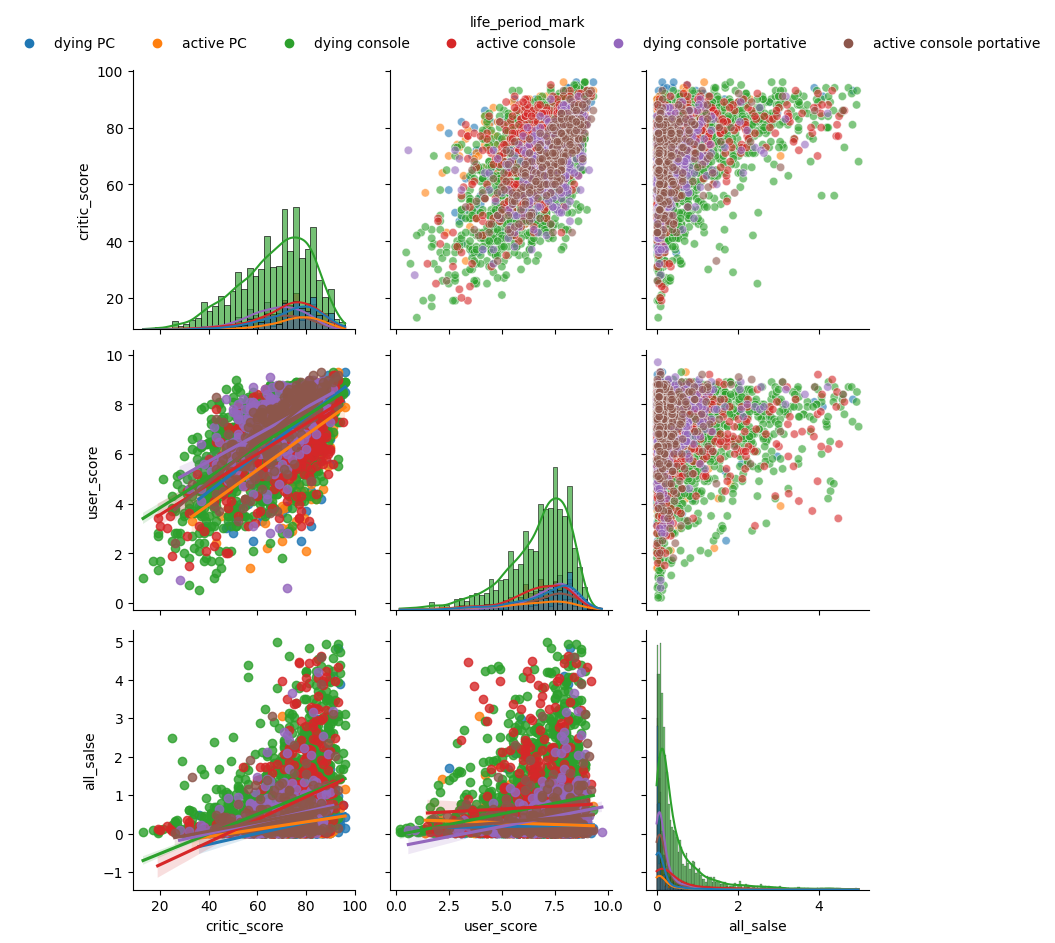

In [51]:
# посмотрим на распределения в данных полях
g = sns.PairGrid(actual.sort_values(by='sort_row')[actual['all_salse']<5][['life_period_mark','critic_score','user_score','all_salse']], hue="life_period_mark", height=3, corner = False)
g.map_lower(sns.regplot)
g.map_diag(sns.histplot,alpha=0.65, kde=True)
g.map_upper(sns.scatterplot,alpha=0.6,edgecolor='white')
g.add_legend(ncol=6,bbox_to_anchor=(-.45, 0.95, 1., .102), loc='upper right')
plt.show();

* **На графике можно заметить, что продажи, оценки пользователей и оценки критиков имеют подобные распределения с незначительными изменениямпи в разных срезах. На диагриммах рассеивания мы можем заметить наличие сильной корреляции между оценками пользователей и критков по всем срезам. Корреляция количества продаж и пользовательских оценок имеет положительное значение и выражена в меньшей степени чем  корреляция оценок критиков с продажими, причем наблюдаются существенные различия по срезам платформ и периодов**

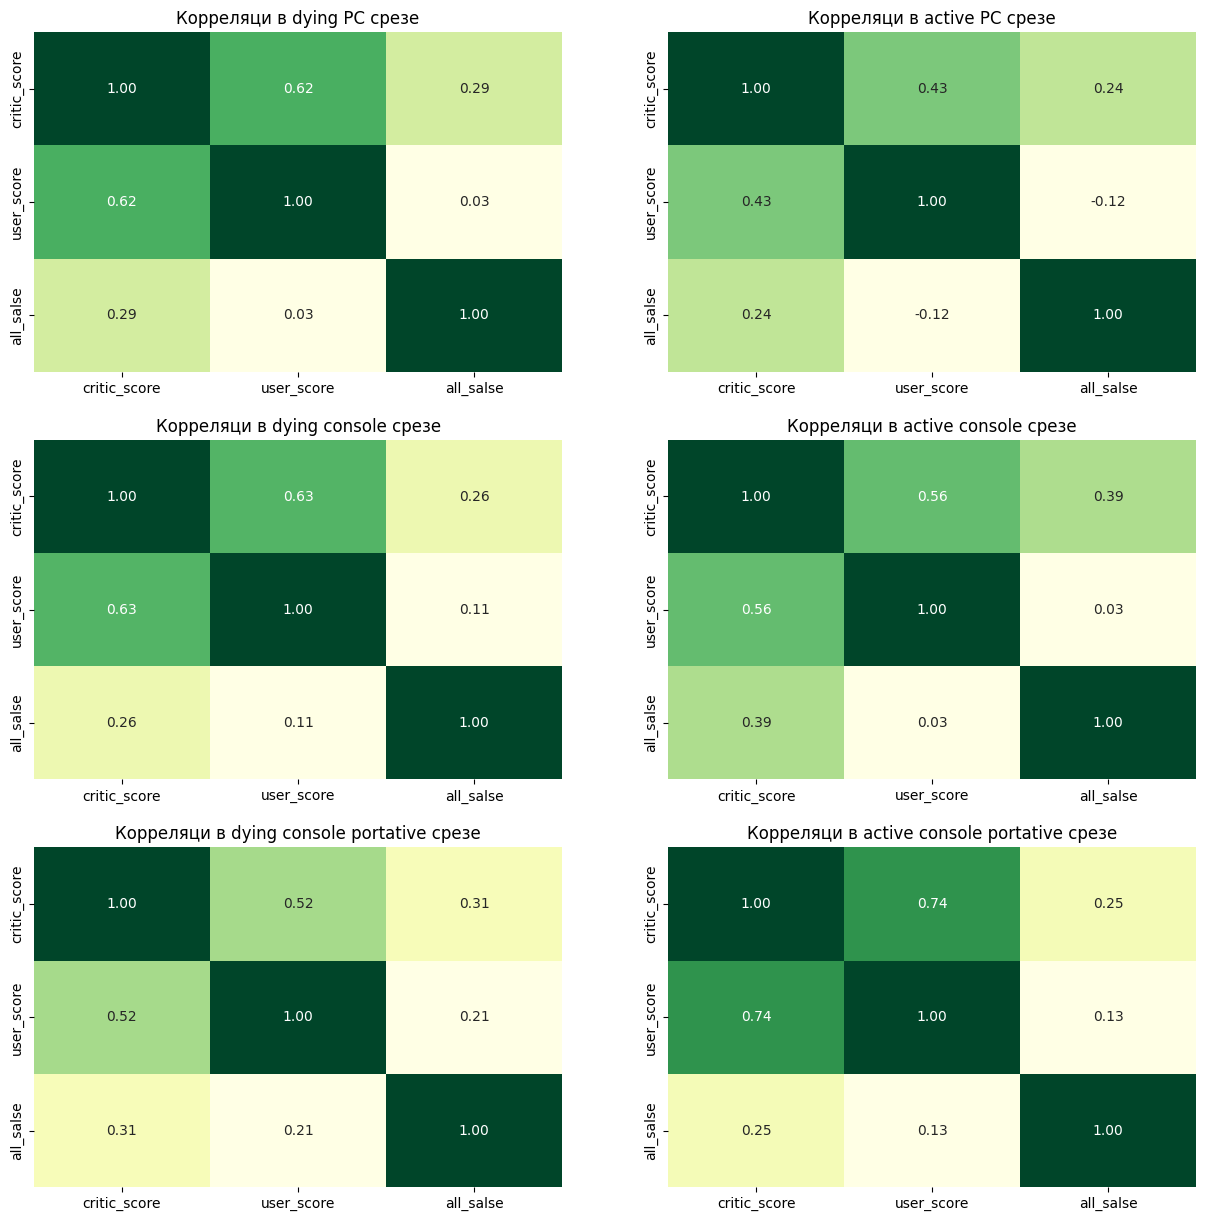

In [52]:
# построим тепловие карты коррелиция для их более точного анализа
plt.figure(figsize=(15,15))
for i,k in zip(actual.sort_values(by='sort_row')['life_period_mark'].unique(),range(6)):
  ax = plt.subplot(3,2,k+1)
  sns.heatmap(round(actual[actual['life_period_mark']==i][['critic_score','user_score','all_salse']].corr(),2),annot=True,fmt = '.2f',cbar=False,
              xticklabels=True, yticklabels=True,cmap='YlGn', ax = ax)
  plt.title('Корреляци в '+str(i)+" срезе")
plt.show()

* **При детальном изучении тепловых карт корреляций оценок с количеством продаж в выборках разных платформ и периодов можно заметить, что пользовательские оценки имеют минимальную связь с количеством продаж в то время как критики чаще ставят высокие оценки потенциально успешным проектам. Также можно отметить, что связь оценок и продаж в разрезе консолей подросла относительно уходящего поколения, в то время как по срезам пк и портативных приставок наоборот снизилась.**

 # Составим портрет пользователя каждого региона

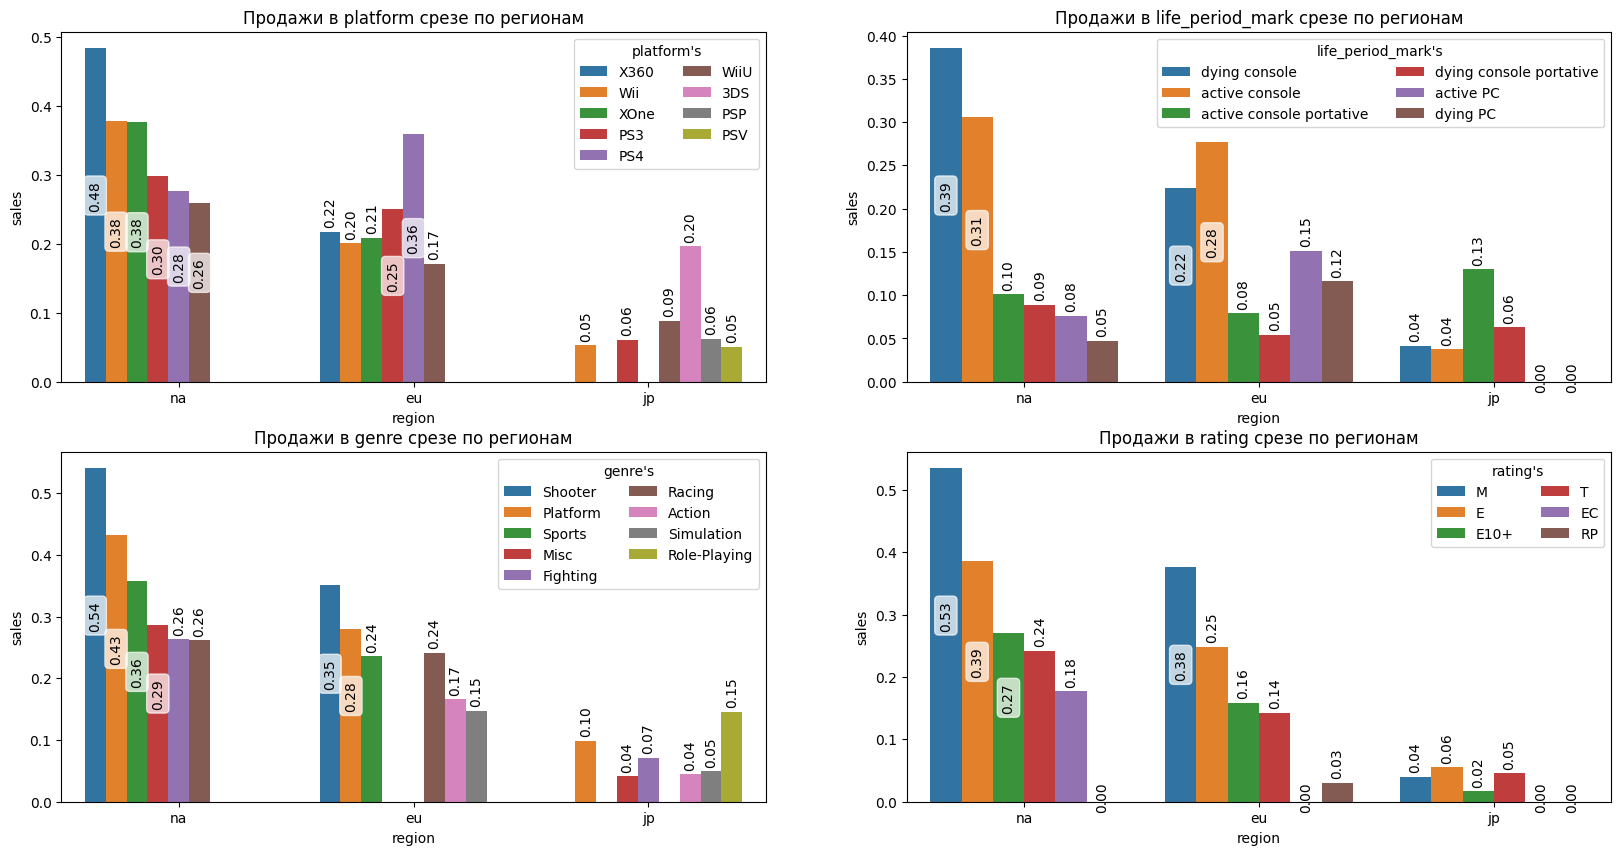

In [53]:
# выделим данные и построим графики продаж по регионам в разных разрезах
plt.figure(figsize=(20,10,))
for i, k in zip(['platform','life_period_mark','genre','rating'], range(4)):

  top_plat = actual.groupby(by=i)['na_sales',	'eu_sales',	'jp_sales'].mean()
  top = pd.DataFrame()
  for m, n in zip(top_plat.columns,range(3)):

    tmp = top_plat[m].sort_values(ascending=False).head(6)
    reg = str(m).split('_')[0]

    tmp = tmp.to_frame()
    t = tmp.columns[0]
    tmp.columns = ['sales']
    tmp = pd.concat([tmp], keys=[reg], names=['region'])
    tmp = tmp
    top = pd.concat([top,tmp], axis =0)
  ax = plt.subplot(2,2,k+1)
  sns.barplot(top.reset_index(), x = 'region', y='sales', hue = i , ax = ax)
  plt.title('Продажи в '+str(i)+" срезе по регионам")
  add_value_labels(ax,'bar', space=3,fmt='{:,.2f}')
  plt.legend(ncol = 2, title=i+"'s")
plt.show()


* **После анализа продаж в различых разрезах мы можем выявить определенные региональные закономерности. Так при анализе предпочтения платформ мы видим, что пользователи Северной Америки делают выбор в пользу платформ от Microsoft тогда как продукты SONY и Nintendo Менее популярны. Европейский регион напротив больше выбирает продукты Sony причем можно обратить внимание на то, что на Европейском рынке продажи свежей консоли PS4 уже обогнали уходящую PS3. На рынке японии доминируют продукты Nintendo, новая консоль Wiiu и портативная 3DS. Также можно отметить, что основной рынок PC игр это Европа, тогда как партативные кансоли очень популярны у предстовителей Японии. Что косается жанров то топ 3 на Европейском и Американском рынках схожий - это shooter, platform и sports, однако в Европе совсем не популярны жанры fighting и misic. Топ 3 Японии значительно отличается - это Role-playing, platform и fightting. Несмотря на довльно серьезное возростное огранисчение - "М" игры с ним имеют самые высокие продажи в Северной Америке и Европпе, что либо говорит о более старшем возростном составе геймеров этих регионов относительно Японии, либо, что более вероятно, несоблюдением этого регламинта. В Японии же продажи с этим рейтингом находятся лишь на 3 месте, что говорит о более строгом отношении к нему**

# Вывод по результатам исследовательского анализа данных:
* **Данные представлены с 1980 по 2016 год. Бурный рост количества игр наблюдается с середины 90-х по 2008, даллее выден спад возможной причиной которого может быть экономический кризис 2008 года**
* **Самые высокие продажи в Северной Америке, самые низкие в Японии**
* **Пользовательские рейтинги имеют левостороннее распределение смещенное в большую сторону с медианным значением в 7.5 баллов и стандартным отклонением в 1.5, оценки выставлены по 10 бальной шкале. Оценки критиков имеют также левостороннее распределение смещенное в большую сторону с медианным значением в 71 балл и стандартным отклонением в 14, что имеет очень похоже на картину с оценками пользователей, с небольгим смижением в меньшую сторону**
* **В топе находится категория для всех, что неудивительно так как это самая многочисленная категория геймеров. Категории 'AO' и 'EC' две крайности для совсем юных и уже взрослых геймеров, количество игр и продажи по ним на очень низком уровне. Также видно, что в категории для лиц старше 17 лет больше количество продаж на игру чем в сопостовимой катигории для подростков.**
* **Игры часто портируются на разные платформы и переиздаются в разные годы**
* **В лидерах игры в жанре sports и action, тогда как пазлы, стратегии и приключения не имели больших продаж. Так же можно обратить внимание на давольно высокий показатель отношения количества игр на количество продаж в жанрах shooter и platform тогда как в жанрах преключения и стратегии этот показатель один из самых низких**
* **Доля продаж 10 малоизвестных платформ составляет: 0.01**
* **На историческом графике изменения кольчества продаж по годам отчетливо видны циклы роста и угасания платформ, в целом средний срок жизни платформы составляет от 5 до 10 лет. Причем первую половину жизненного цикла наблюдается приимущественно рост продаж тогда как вторую спад. Начиная с 90 годов прошлого века заметен бурный рост гейм индустрии, однако после 2008 года наблюдается коррекция продаж, возможно связанная с финансовым кризисом. Также мы можем заметить наличие большого количества уже умерших платформ на текущую дату, для анализа актуальной ситуации на рынке эти данные будут не информативны.**
* **До середины 90 годов нет четких тенденций в изменении доли жанров, однако в этот период доминируют платформенные игры и пазлы, что можно объяснить расцветом 8-ми битных приставок и таках культовых игр как "Contra", "Battle City", бесконечное число ремейков "Mario" и многое другое. Всплеск доли пазлов в этот период - это возможная заслуга "Microsoft Solitaire". Начиная с 00-х можно заметить четкую тенденцию на спад платформеров и рост доли игр в жанрах  shooter и action, что говорит о приходе на рынок новых платформ с более мощным железом, которые задают тренд на 3-х мерные игры с возможностью многопользовательской игры по сети интернет**
* **На многих платформах не выходят новые игры уже больше 2 лет исходя из чего можно предположить что цикл их активного существования завершен**
* **Средний срок жизни по платформам прошедшим цикл существования порядка 10 лет**
* **На графике срока жизни актуальных платформ можно заметить как старичков, доживающих свой срок, так и довольно молодие платформы, набирающие популярность. Можно предположить что основной вклад в общие продажи внесут довольно молодие платформы со сроком жизни 3-5 лет в сочитанием с продажами на пк**
* **Актуальными платформами можно считать платформы, которые имели хотябы один релиз в текущем и прошом году, платформы с отсутствием новых релизов в этот период можно считать неактуальными**
* **Актуальные платформы чтетко разделились по покалениям 10-11 лет это уходящие и затухающие платформы и 3-5 лет довольно молодые и перспективные, на которые надо делать ставку при прогнозировании и формировании маркетинговых компаний. Основная конкуренция на рынке игровой индустрии между консолями Microsoft, Nintendo и Sony. Партативные консоли выпускают и обновляют Nintendo и Sony. Максимальные продажами могут похвастаться кансоли Sony и Xbox игры Nintendo имеют чуть более скромные резултаты. Продажи игр на пк имеют значительно меньшие размеры и немного другую целевую аудиторию, ввиду чего анализ пк геиминга можно проводить отдельно.**
* **На пк выходит наименьшее число игр в сравнении с популярными консолями. Так же отметим, что на свежие партативные платформы уже вышло практически равное количество игр что и на умирающие за весь их срок жизни, это в свою очередь может свидетельствовать о росте интереса к портативным кансолям**
* **При ананизе жанров в разрезе пк мы можем наблюдать изменения в предпочтениях пользователей и рост продаж в жанрах shooter, simulation и Role-playing, при смене периодов, что объясняется выходом довольно популярных пректов таких как "Call of duty: black ops", "Buttlefiled 4", "simcity"  и другие в этих них. Если мы посмотрим на консоли то тут схожая картина в жанре shooter, но в большем масштабе, а также рост продаж по жанру спортивных игр. В жанрах Fighting и Platform мы можем заметить снижение продаж. Что касается партативных кансолей то тут относительная стабильность с незначительнам ростом продаж в жанре Platform. В целом заметна тенденция на рост популярности игр с возможностью игры и коммуникаций по сети интернет, также сказывается развиите различных киберспортивных мероприятей**
* **Продажи, оценки пользователей и оценки критиков имеют подобные распределения с незначительными изменениямпи в разных срезах. На диагриммах рассеивания мы можем заметить наличие сильной корреляции между оценками пользователей и критков по всем срезам. Корреляция количества продаж и пользовательских оценок имеет положительное значение и выражена в меньшей степени чем  корреляция оценок критиков с продажими, причем наблюдаются существенные различия по срезам платформ и периодов**
* **Пользовательские оценки имеют минимальную связь с количеством продаж в то время как критики чаще ставят высокие оценки потенциально успешным проектам. Также можно отметить, что связь оценок и продаж в разрезе консолей подросла относительно уходящего поколения, в то время как по срезам пк и портативных приставок наоборот снизилась.**
* **После анализа продаж в различых разрезах мы можем выявить определенные региональные закономерности. Так при анализе предпочтения платформ мы видим, что пользователи Северной Америки делают выбор в пользу платформ от Microsoft тогда как продукты SONY и Nintendo Менее популярны. Европейский регион напротив больше выбирает продукты Sony причем можно обратить внимание на то, что на Европейском рынке продажи свежей консоли PS4 уже обогнали уходящую PS3. На рынке японии доминируют продукты Nintendo, новая консоль Wiiu и портативная 3DS. Также можно отметить, что основной рынок PC игр это Европа, тогда как партативные кансоли очень популярны у предстовителей Японии. Что косается жанров то топ 3 на Европейском и Американском рынках схожий - это shooter, platform и sports, однако в Европе совсем не популярны жанры fighting и misic. Топ 3 Японии значительно отличается - это Role-playing, platform и fightting. Несмотря на довльно серьезное возростное огранисчение - "М" игры с ним имеют самые высокие продажи в Северной Америке и Европпе, что либо говорит о более старшем возростном составе геймеров этих регионов относительно Японии, либо, что более вероятно, несоблюдением этого регламинта. В Японии же продажи с этим рейтингом находятся лишь на 3 месте, что говорит о более строгом отношении к нему**

# Проверка статистической зничимости различий между выборками

## Гиротеза 1:
* **Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

H0 - различий в показателях пользовательских рейтингов платформ Xbox One и PC нет
****
H1 - присутствуют статистически значимые различия в показателях пользовательских рейтингов платформ Xbox One и PC
****

критический уровень значимости alpha = 0.05

## **Формирование семплов и их анализ для проведения статистического теста**

In [54]:
# выделим данные. Для пк нижнюю рамку поставим в момент релиза консоли
sempl_PC = df.loc[(df['platform']=='PC')&(df['year_of_release']>'2013-01-01')]['user_score']
semple_Xbox = df.loc[df['platform']=='XOne']['user_score']


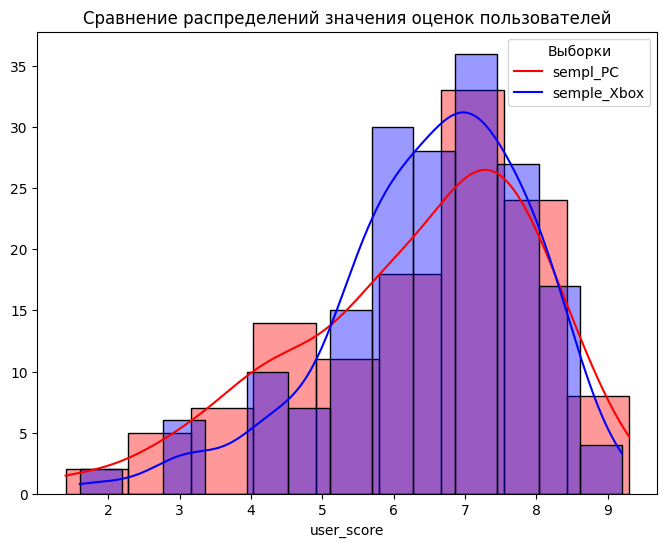

'sempl_PC'

count    122.000000
mean       6.298361
std        1.703278
min        1.400000
25%        5.325000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

'semple_Xbox'

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

In [55]:
# Построим график разпределения значений и выведим описательную статистику
plt.figure(figsize=(8,6))
sns.histplot(sempl_PC,legend = True,color='red',kde=True,alpha=0.4)
sns.histplot(semple_Xbox, legend = True,color='blue',kde=True,alpha=0.4)
plt.legend(['sempl_PC','semple_Xbox'],title='Выборки')
plt.ylabel('')
plt.title('Сравнение распределений значения оценок пользователей')
plt.show()
display('sempl_PC',sempl_PC.describe(),'semple_Xbox',semple_Xbox.describe())

* **По результатам анализа можно заметить везуальое подобие распределений оценок в двух выборках - они левосторонние, однако количество эксперементов в семпле Xbox выше. К тому же мы видим довольно высокое значение стандартного отклонения, что может говорить о ненормальности распределений, есть основания это проверить для корректного выбора статистического теста**

In [56]:
# проведем тест Шапиро-Уилка для определения нармальности распределений
result = st.shapiro(sempl_PC.dropna())
result
print(f'Значение p-value для sempl_PC: {result[1]}')
result = st.shapiro(semple_Xbox.dropna())
result
print(f'Значение p-value для semple_Xbox: {result[1]}')

Значение p-value для sempl_PC: 0.00017992201901506633
Значение p-value для semple_Xbox: 1.5249203897838015e-05


* **По результатам теста нельзя с уверенностью сказать что выборки нормально распределены, для их сравнения больше подойдет непараметрический тест. Будем использовать тест Манна - Уитни**

In [57]:
# проведем статистический тест
alpha = 0.05
results = st.mannwhitneyu(sempl_PC.dropna(), semple_Xbox.dropna())
print('**************************************')
print(f'p-значение равно: ', results.pvalue)
if results.pvalue < alpha:
  print('Отвергаем нулевую гипотезу')
else:
  print('Не получилось отвергнуть нулевую гипотезу')

**************************************
p-значение равно:  0.514942237862434
Не получилось отвергнуть нулевую гипотезу


* **По результатам теста мы видим, что уровень статистической значимости выше выбранного значения alpha, поэтому у нас нет достаточного основания отвергнуть H0 гипотезу, статистически значимых различий в показателях пользовательских рейтингов платформ Xbox One и PC нет**

## Гиротеза 2:
* **Средние пользовательские рейтинги жанров Action и Sports разные**

H0 - различий в показателях пользовательских рейтингов жанров Action и Sports нет
****
H1 - присутствуют статистически значимые различия в показателях пользовательских рейтингов жанров Action и Sports
****

критический уровень значимости alpha = 0.05

In [58]:
# выделим данные
semple_Action = df.loc[(df['genre']=='Action')]['user_score']
semple_Sports = df.loc[df['genre']=='Sports']['user_score']


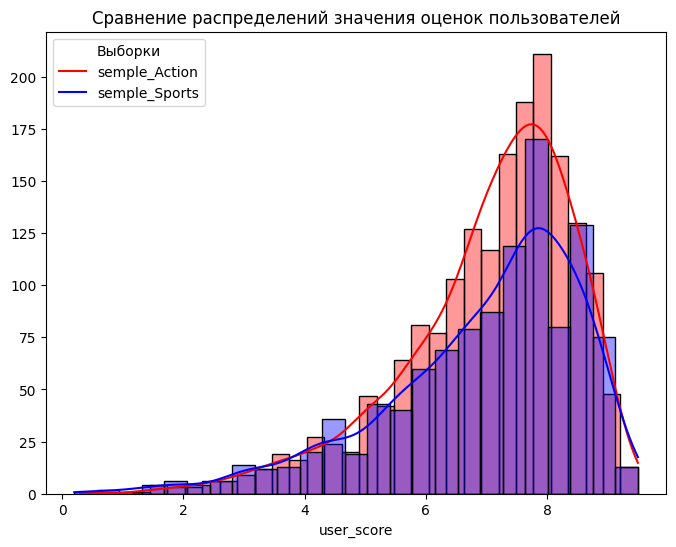

'semple_Action'

count    1830.000000
mean        7.054044
std         1.425394
min         0.300000
25%         6.300000
50%         7.400000
75%         8.100000
max         9.500000
Name: user_score, dtype: float64

'semple_Sports'

count    1102.000000
mean        6.962069
std         1.611842
min         0.200000
25%         6.100000
50%         7.400000
75%         8.100000
max         9.500000
Name: user_score, dtype: float64

In [59]:
# Построим график разпределения значений и выведим описательную статистику
plt.figure(figsize=(8,6))
sns.histplot(semple_Action,legend = True,color='red',kde=True,alpha=0.4)
sns.histplot(semple_Sports, legend = True,color='blue',kde=True,alpha=0.4)
plt.legend(['semple_Action','semple_Sports'],title='Выборки')
plt.ylabel('')
plt.title('Сравнение распределений значения оценок пользователей')
plt.show()
display('semple_Action',semple_Action.describe(),'semple_Sports',semple_Sports.describe())

* **По результатам анализа можно заметить везуальое подобие распределений оценок в двух выборках - они левосторонние, однако количество эксперементов в семпле Action выше на 700. К тому же мы видим довольно высокое значение стандартного отклонения, как в эксперемете выше, что может говорить о ненормальности распределений, есть основания это проверить для корректного выбора статистического теста**

In [60]:
# проведем тест Шапиро-Уилка для определения нармальности распределений
result = st.shapiro(semple_Action.dropna())
result
print(f'Значение p-value для semple_Action: {result[1]}')
result = st.shapiro(semple_Sports.dropna())
result
print(f'Значение p-value для semple_Sports: {result[1]}')

Значение p-value для semple_Action: 9.827582958998824e-29
Значение p-value для semple_Sports: 4.183277315567281e-24


* **По результатам теста нельзя с уверенностью сказать что выборки ненормально распределены, для их сравнения больше подойдет непараметрический тест. Будем использовать тест Манна - Уитни**

In [61]:
# проведем статистический тест
alpha = 0.05
results = st.mannwhitneyu(semple_Action.dropna(), semple_Sports.dropna())
print('**************************************')
print(f'p-значение равно: ', results.pvalue)
if results.pvalue < alpha:
  print('Отвергаем нулевую гипотезу')
else:
  print('Не получилось отвергнуть нулевую гипотезу')

**************************************
p-значение равно:  0.7365398923373381
Не получилось отвергнуть нулевую гипотезу


* **По результатам теста мы видим, что уровень статистической значимости выше выбранного значения alpha, поэтому у нас нет достаточного основания отвергнуть H0 гипотезу, статистически значимых различий в показателях пользовательских рейтингов жанров Action и Sports нет**

# Вывод по результатам статистических тестов:
* **Нет достаточного основания пологать о наличии статистически значимых различий в показателях пользовательских рейтингов платформ Xbox One и PC**
* **Нет достаточного основания пологать о наличии статистически значимых различий в показателях пользовательских рейтингов жанров Action и Sports**